#### Logistic Regression Coefficients

Regression predicts a quantitative response $Y$ on the basis of predictor variables $X_1, X_2, ... X_n$. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we write this linear relationship as $Y ≈ β0 + β1X_1 + β2X_2 + ... + βnX_n$.

The magnitude of the coefficients is directly influenced by the scale of the features. Therefore, to compare coefficients across features, it is importance that all features are within a similar scale. This is why, normalisation is important for variable importance and feature selection in linear models.

Linear Regression makes the following assumptions over the predictor variables $X$:

- Linear relationship with the outcome $Y$
- Multivariate normality ($X$ should follow a Gaussian distribution)
- No or little multicollinearity ( $X$ s should not be linearly related to one another)
- Homoscedasticity (variance should be the same)

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables (Xs) and the dependent variable (Y)) is the same across all values of the independent variables.

Therefore, there are a lot of assumptions that need to be met in order to make a fair comparison of the features by using only their regression coefficients.

In addition, these coefficients may be penalised by regularisation, therefore being smaller than if we were to compare the relationship of each feature with the target individually.

Having said this, you can still select features based on linear regression coefficients, provided you keep all of these in mind at the time of analysing the outcome.

Personally, this is not my feature selection method of choice, although I find it useful to interpret the output of the model.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [2]:
# load dataset
data = pd.read_csv('../datasets/dataset_2.csv')
data.shape

(50000, 109)

In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [4]:
# we will scale the variables, so we fit a scaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [5]:
# here I will do the model fitting and feature selection
# altogether in 2 lines of code

# first I specify the Logistic Regression model, here I
# select the Ridge Penalty (l2)(it is the default parameter in sklearn)

# remember that here I want to evaluate the coefficient magnitud
# itself and not whether lasso shrinks coefficients to zero

# ideally, I want to avoid regularisation at all, so the coefficients
# are not affected (modified) by the penalty of the regularisation

# In order to do this in sklearn, I set the parameter C really high
# which is basically like fitting a non-regularised logistic regression

# Then I use the selectFromModel object from sklearn
# to automatically select the features

# set C to 1000, to avoid regularisation
sel_ = SelectFromModel(
    LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=10))

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, max_iter=300,
                                             random_state=10))

In [6]:
# this command let's me visualise those features that were kept.

# sklearn will select those features which coefficients are greater
# than the mean of all the coefficients.

# it compares absolute values of coefficients. More on this in a second.

sel_.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False])

In [7]:
# let's add the variable names and order it for clearer visualisation
# and then let's sum the number of selected features

selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

33

In [8]:
# with the parameter coef_ we access the coefficients of the variables
# for the linear regression (for all the 108 variables)

sel_.estimator_.coef_

array([[ 1.14997363e-02, -1.34289556e-02,  1.09291571e-01,
         2.64699124e-02,  4.34231265e-02, -2.46458871e-02,
        -3.33790506e-02, -6.24107599e-03,  2.32225016e-02,
        -9.84550171e-03,  7.99408000e-02,  5.30033199e-02,
        -3.75042466e-02,  1.92404533e-02, -3.86326516e-02,
         2.67567409e-02,  1.36506302e-02,  5.42315046e-02,
         1.30006313e-02,  1.54200091e-02,  1.41674768e-01,
         2.43289088e-02, -1.28385515e-01,  1.26765229e-01,
         1.43876461e-02,  6.35129273e-02,  2.75808239e-02,
        -7.93723212e-04, -1.42166287e-02, -1.44362616e-02,
         6.91222521e-03, -1.86048427e-01, -1.00789503e-01,
         3.27185261e-02,  1.18463473e-02,  4.36532257e-02,
         1.95362469e-02,  4.48919845e-02,  7.91411999e-02,
         7.03105303e-02, -3.50564543e-03, -2.28488246e-03,
        -5.35042005e-02,  5.64670882e-02,  3.65347964e-03,
         3.03763397e-02,  4.84582057e-03,  4.23988908e-01,
         2.17096889e-02,  7.33828011e-02,  1.50564552e-0

In [9]:
# as SelectFromModel selects coefficients above the mean
# of all coefficients, let's calculate first the mean

sel_.estimator_.coef_.mean()

0.012040930325811295

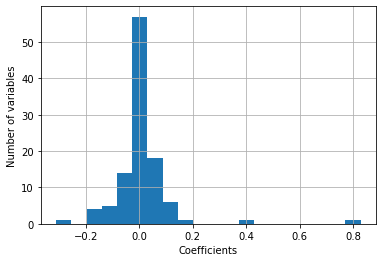

In [10]:
# and now let's plot the distribution of coefficients

pd.Series(sel_.estimator_.coef_.ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

As expected, some coefficients are positive and some are negative, suggesting that some features are negatively associated with the outcome (the more of the feature the less of the outcome) and viceversa.

However, the absolute value of the coefficients inform about the importance of the feature on the outcome, and not the sign. Therefore, the feature selection is done filtering on absolute values of coefficients. See below.

In [11]:
# the feature importance is informed by the absolute value of
# the coefficient, and not the sign.
# therefore, let's recalculate the mean using the absolute values instead

np.abs(sel_.estimator_.coef_).mean()

0.05686182164621318

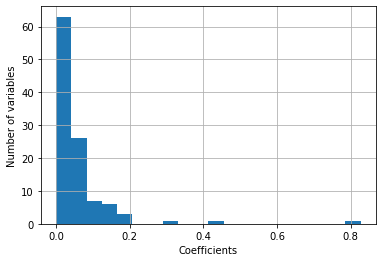

In [12]:
# and now let's plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [13]:
# and now, let's compare the  number of selected features
# with the number of features which coefficient is above the
# mean coefficient, to make sure we understand the output of
# SelectFromModel

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

total features: 108
selected features: 33
features with coefficients greater than the mean coefficient: 33


Therefore, we see how select from model works. It will select all the coefficients which absolute values are greater than the mean.